In [1]:
%load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['paper.mplstyle'])

In [3]:
seed = 1
dir = f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-5/ramping/seed_{seed}_250_2"
targets = np.loadtxt(f'/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_lambda_1E-6/seed_4/targets')
proj_dir = "home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_4/projs_300_350"
def mov(t):
    return np.loadtxt(f'{dir}/thetas_0_{t}')
def loss(t, a = 0):
    return np.loadtxt(f'{dir}/loss_{a}_{t}')
def cost_u(t):
    return np.loadtxt(f'{dir}/u_cost_0_{t}')[-1]
def task_cost(t):
    return np.loadtxt(f'{dir}/task_cost_0_{t}').sum()
def rates(t):
    return np.loadtxt(f'{dir}/rates_0_{t}')
def us(t):
    return np.loadtxt(f'{dir}/us_0_{t}')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


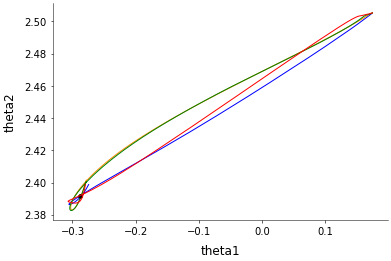

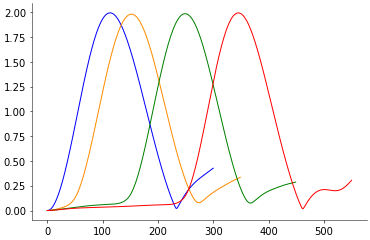

In [4]:
cs = ["b", "darkorange", "g", "r", "cyan", "forestgreen", "m"]
times = [0, 100, 300, 500]
for i, t in enumerate(times):
    plt.plot(targets[0,0], targets[0,1], 'ko')
    plt.plot(mov(t)[:,0], mov(t)[:,1], cs[i])
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.show()
plt.figure()
for i, t in enumerate(times):
    plt.plot(np.sqrt(mov(t)[:,2]**2+mov(t)[:,3]**2), cs[i])

()


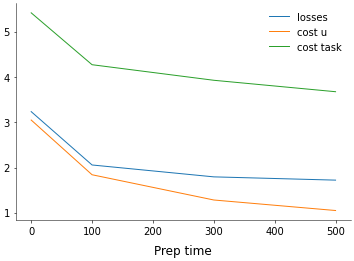

In [5]:
losses = [loss(t, 1) for t in times]
u_cost = [cost_u(t) for t in times]
print(u_cost[0].shape)
cost_task = [task_cost(t) for t in times]
plt.plot(times,losses, label="losses")
plt.plot(times, u_cost, label="cost u")
plt.plot(times, cost_task, label="cost task")
plt.xlabel("Prep time")
plt.legend()
plt.show()

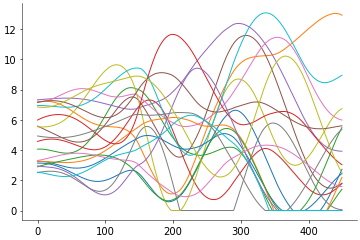

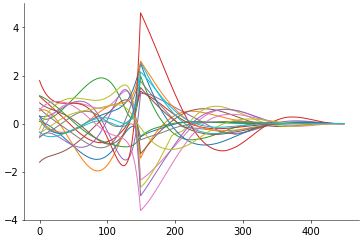

In [6]:
plt.figure()
x = rates(300)
for i in np.arange(20):
    plt.plot(x[:,i])
plt.show()
plt.figure()
u = us(300)
for i in np.arange(20):
    plt.plot(u[:,i])
plt.show()

(8, 4)
Short break in-between movements


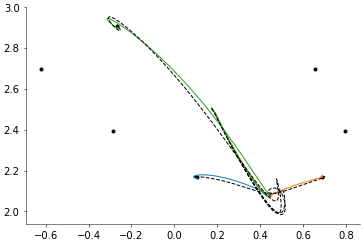

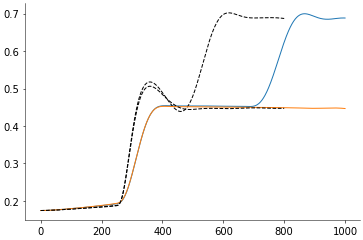

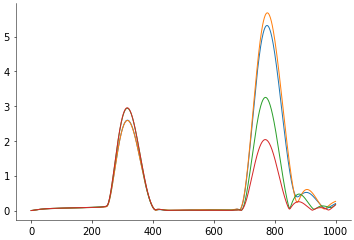

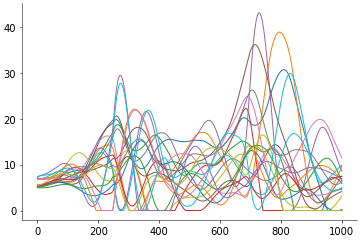

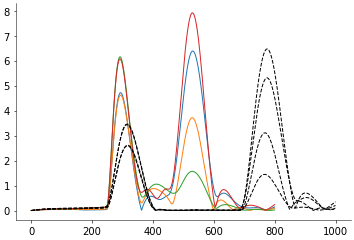

In [7]:
double_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping/seed_4_200_2_1.5_rerun/double_ramping_2003002_pause_0.6"

double_dir_short = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping/seed_4_200_2_1.5_rerun/double_ramping_2003002_pause_0.2_0._1E-7"

def double_mov(a1, a2, dir = double_dir):
    return np.loadtxt(f'{dir}/thetas_{a1}_{a2}_500')

def double_rates(a1, a2, dir = double_dir):
    return np.loadtxt(f'{dir}/rates_{a1}_{a2}_500')

print(targets.shape)
plt.plot(targets[:,0], targets[:,1], 'ko')
for a in [1, 3,6]:
    plt.plot(double_mov(2,a)[:,0], double_mov(2,a)[:,1])
    plt.plot(double_mov(2,a, dir = double_dir_short)[:,0], double_mov(2,a, dir = double_dir_short)[:,1], '--k')
plt.figure()

for a in [3,2]:
    plt.plot(double_mov(2,a)[:,0])
    plt.plot(double_mov(2,a, dir = double_dir_short)[:,0], "--k")
plt.figure()

for a1 in [0,5]:
    for a2 in [3,4]:
        plt.plot(np.sqrt(double_mov(a1,a2)[:,2]**2+double_mov(a1,a2)[:,3]**2))
plt.figure()
for a1 in [0,5]:
    for a2 in [3,6]:
        for i in [1,10,50,144,182]:
            plt.plot(double_rates(a1,a2)[:,i])


print("Short break in-between movements")
plt.figure()
for a1 in [0,4]:
    for a2 in [3,6]:
        plt.plot(np.sqrt(double_mov(a1,a2, dir = double_dir_short)[:,2]**2+double_mov(a1,a2, dir = double_dir_short)[:,3]**2))

for a1 in [0,4]:
    for a2 in [3,6]:
        plt.plot(np.sqrt(double_mov(a1,a2)[:,2]**2+double_mov(a1,a2)[:,3]**2), '--k')

In [8]:
# vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/projs_300_400_scaled/vprep")
# vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/projs_300_400_scaled/vmov")
vprep = np.loadtxt('/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1_300_2/projs_3003502/vprep')
vmov = np.loadtxt('/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1_300_2/projs_3003502/vmov')
vprep_2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/projs_300_350_0.025_0.025/vprep")
vmov_2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/projs_300_350_0.025_0.025/vmov")
plt.plot(vprep, 'k', label="prep")
plt.plot(vmov, 'r', label="mov")
plt.plot(vprep_2, 'k--')
plt.plot(vmov_2, 'r--')
# plt.plot(vprep_3, 'y', label="prep")
# plt.plot(vmov_3, 'g', label="mov")
# plt.plot(vprep_4, '--y', label="prep")
# plt.plot(vmov_4, '--g', label="mov")
plt.legend()
plt.show()

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1_300_2/projs_3003502/vprep not found.

In [ ]:
seed = 1
tanh_dir = f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_2."
def mov_tanh(t):
    return np.loadtxt(f'{tanh_dir}/thetas_0_{t}')
def loss_tanh(t):
    return np.loadtxt(f'{tanh_dir}/loss_0_{t}')
def cost_u_tanh(t):
    return np.loadtxt(f'{tanh_dir}/u_cost_0_{t}')[-1]
def task_cost_tanh(t):
    return np.loadtxt(f'{tanh_dir}/task_cost_0_{t}').sum()
def rates_tanh(t):
    return np.loadtxt(f'{tanh_dir}/rates_0_{t}')
def mov_tanh(t):
    return np.loadtxt(f'{tanh_dir}/thetas_0_{t}')
def us_tanh(t):
    return np.loadtxt(f'{tanh_dir}/us_0_{t}')

In [ ]:
times = [0, 100, 300, 500]
losses = [loss_tanh(t) for t in times]
u_cost = [cost_u_tanh(t) for t in times]
print(u_cost[0].shape)
cost_task = [task_cost_tanh(t) for t in times]
plt.plot(times,losses, label="losses")
plt.plot(times, u_cost, label="cost u")
plt.plot(times, cost_task, label="cost task")
plt.xlabel("Prep time")
plt.legend()
plt.show()

plt.figure()
x_tanh = rates_tanh(500)
for i in np.arange(20):
    plt.plot(x_tanh[:,i])
plt.show()
plt.figure()
u_tanh = us_tanh(500)
for i in np.arange(20):
    plt.plot(u_tanh[:,i])
plt.show()
plt.figure()
for i, t in enumerate(times):
    plt.plot(targets[0,0], targets[0,1], 'ko')
    plt.plot(mov_tanh(t)[:,0], mov_tanh(t)[:,1], cs[i])
plt.xlabel("theta1")
plt.ylabel("theta2")

## Occupancy analyses

### SOC occupancy

In [ ]:
vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/analysis/vprep")
vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_1/analysis/vmov")
plt.plot(vprep)
plt.plot(vmov)

### Skew-net occupancy

In [ ]:
vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_2./analysis/vprep")
vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_2./analysis/vmov")
vprep_2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_0.5/analysis/vprep")
vmov_2 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_0.5/analysis/vmov")
vprep_3 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_4./analysis/vprep")
vmov_3 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_skew/rad_4./analysis/vmov")
plt.plot(vprep)
plt.plot(vmov)
plt.figure()
plt.plot(vprep_2)
plt.plot(vmov_2)
plt.figure()
plt.plot(vprep_3)
plt.plot(vmov_3)

In [ ]:
vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_rdn/rad_2./analysis/vprep")
vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_rdn/rad_2./analysis/vmov")
plt.plot(vprep)
plt.plot(vmov)
vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_rdn/rad_0.5/analysis/vprep")
vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping_rdn/rad_0.5/analysis/vmov")
plt.figure()
plt.plot(vprep)
plt.plot(vmov)

In [ ]:
seed = 1
dirs = [f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_350_1",
f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_350_2", 
f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_300_1",
f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_300_2",
f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_400_1",
f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_400_2"]

def rates(dir, t, i = 0):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')

def us(dir, t, i = 0):
    return np.loadtxt(f'{dir}/us_{i}_{t}')

def torques(dir, t, i = 0):
    return np.loadtxt(f'{dir}/torques_{i}_{t}')

def mov(dir, t, i = 0):
    return np.loadtxt(f'{dir}/thetas_{i}_{t}')


fig, axes = plt.subplots(nrows=6, ncols=4,  figsize=(8, 3), dpi = 400)


cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

for j in range(6):
#plot the trajectories 
    for i, n in enumerate(neurons): 
        axes[j, 0].plot(rates(dirs[j], 300)[:,n], 'k')
    axes[j,0].set_xlabel('time (ms)', labelpad = -0.5)
    axes[j,0].set_ylabel('rates')
    axes[j,0].axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
    axes[j,0].set_xticks([0,150,300], ['-$\\Delta_{prep}$', '0', '300'])
    #plot the inputs
    for i, n in enumerate(neurons): 
        axes[j, 1].plot(us(dirs[j], 300)[:,n], 'k')
    axes[j,1].set_xlabel('time (ms)', labelpad = -0.5)
    axes[j,1].set_ylabel('inputs')
    axes[j,1].axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
    axes[j,1].set_xticks([0,150,300], ['-$\\Delta_{prep}$', '0', '300'])

    axes[j,2].plot(np.sqrt(mov(dirs[j], 300)[:,2]**2 + mov(dirs[j], 300)[:,3]**2), 'k')
    axes[j,2].set_xlabel('time (ms)', labelpad = -0.5)
    axes[j,2].set_ylabel('vel')
    axes[j,2].axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
    axes[j,2].set_xticks([0,150,300], ['-$\\Delta_{prep}$', '0', '300'])


    axes[j,3].plot(torques(dirs[j], 300)[:,0], 'k')
    axes[j,3].plot(torques(dirs[j], 300)[:,1], 'k')
    axes[j,3].set_xticks([0,150,300], ['-$\\Delta_{prep}$', '0', '300'])

In [ ]:
def proj_prep(i):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_300_2/pca/proj_reach_prep_{i}_300")

def proj_mov(i):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_300_2/pca/proj_reach_mov_{i}_300")

def proj_all(i):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs133-hh9aMiOkJqI/mmcs3/random_monkeys_random_lambda_1E-6/ramping/seed_{seed}_300_2/pca/proj_reach_{i}_300")

n_prep = 149
for i in range(7):
    plt.plot(proj_prep(i)[:n_prep,0], proj_prep(i)[:n_prep,1], "r")
    plt.plot(proj_all(i)[:n_prep,0], proj_all(i)[:n_prep,1], 'b')
    plt.plot(proj_mov(i)[:n_prep,0], proj_mov(i)[:n_prep,1], 'k--')


plt.figure()
for i in range(7):
    plt.plot(proj_prep(i)[n_prep:n_prep+50,0], proj_prep(i)[n_prep:n_prep+50,1], "r")
    plt.plot(proj_all(i)[n_prep:n_prep+50,0], proj_all(i)[n_prep:n_prep+50,1], 'b')
    plt.plot(proj_mov(i)[n_prep:n_prep+50,0], proj_mov(i)[n_prep:n_prep+50,1], 'k--')


plt.figure()
for i in range(7):
    plt.plot(proj_prep(i)[n_prep:,0], proj_prep(i)[n_prep:,1], "r")
    plt.plot(proj_all(i)[n_prep:,0], proj_all(i)[n_prep:,1], 'b')
    plt.plot(proj_mov(i)[n_prep:,0], proj_mov(i)[n_prep:,1], 'k--')
plt.figure()
for i in range(7):
    plt.plot(proj_all(i)[:,0], proj_all(i)[:,1])

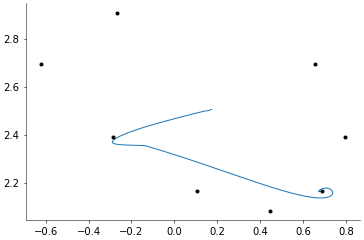

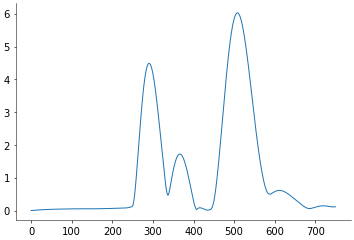

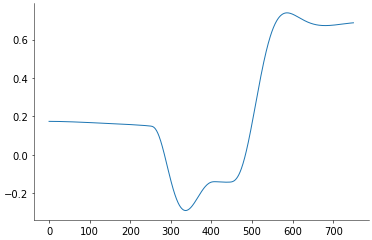

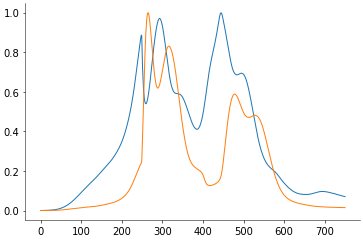

In [31]:
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping/seed_4_200_2_1.5_rerun/double_ramping_2003002_pause_0.1_1E-7"
angles = np.loadtxt(f"{dir}/thetas_0_3_500")
plt.plot(angles[:,0], angles[:,1])
plt.plot(targets[:,0], targets[:,1], 'ok')
plt.figure()

plt.plot(np.sqrt(angles[:,2]**2+angles[:,3]**2))
plt.figure()

plt.plot(angles[:,0])

vprep = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping/seed_4_200_2_1.5_rerun/projs_0.1_1E-7/vprep")
vmov = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping/seed_4_200_2_1.5_rerun/projs_0.1_1E-7/vmov")
plt.figure()
plt.plot(vprep)
plt.plot(vmov)
